In [22]:
import numpy as np
import gensim
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import re
import statsmodels.formula.api
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
%matplotlib nbagg

In [32]:
df = pd.read_csv("data/kaggle_toxicity/train.csv")
df[df["identity_hate"]==1][:5]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1


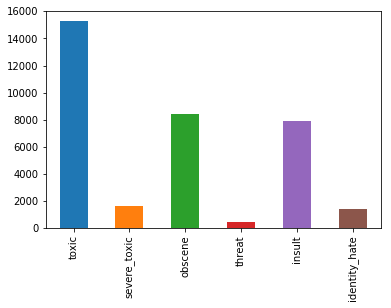

In [4]:
plt.figure()
df.sum(numeric_only=True).plot("bar")

In [5]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format('data/embeddings/GoogleNews-vectors-negative300.bin.gz', binary=True)

## Estimate Identity hate subspace

In [39]:
np.sum(np.mean(X,axis=0)),np.sum(np.mean(X,axis=1))

(-0.7198717448132997, -3.280215583865936)

In [45]:
stop_words = set(stopwords.words('english')) 
cols = df[df["identity_hate"]==1]
X = np.zeros((1405,300))#also get rid of bad spellings (stemming)?
for i,comment in enumerate(cols["comment_text"].items()):
    w = re.sub('[^a-z ]+', '', comment[1].lower()).split(" ")
    wf = filter(lambda x: x in embeddings and not x in stop_words,w)  
    if len(wf)>0:
        X[i,:] = np.mean(embeddings[wf],axis = 0) # get rid of stop words
X = X[np.all(X!= 0, axis=1)]
X = X-np.mean(X,axis=0)
X = X/np.sqrt(np.var(X,axis=0))

<Container object of 300 artists>

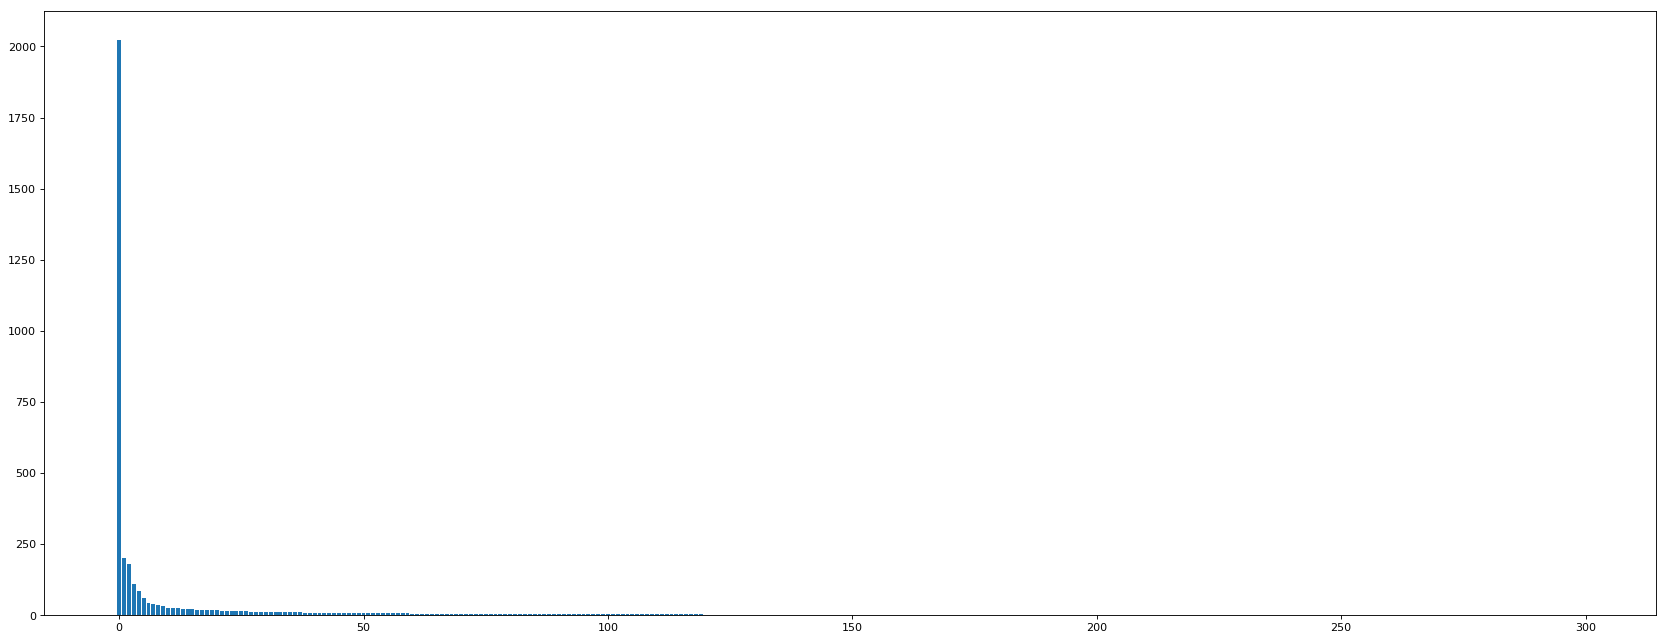

In [47]:
%matplotlib inline
u, s, vh = np.linalg.svd(np.dot(X.T,X), full_matrices=True)
plt.figure(figsize=(26, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(np.arange(len(s)),s)